# 四种基本操作

反射又名**自省**、映射

可以通过字符串的形式来操作（增删改查）一个对象的属性或方法

In [ ]:
"""
反射的概念是由Smith在1982年首次提出的，主要是指程序可以访问、检测和修改它本身状态或行为的一种能力(自省)。
这一概念的提出很快引发了计算机科学领域关于应用反射性的研究。
它首先被程度语言的设计领域所采用,并在Lisp和面向对象方面取得了成绩。

python面向对象中的反射:通过字符串的形式操作对象相关的属性。python中的一切事物都是对象(都可以使用反射)

四个可以实现自省的函数

下列方法适用于类和对象(一切皆对象，类本身也是一个对象)

"""

def hasattr(*args, **kwargs):
  """
  Return whether the object has an attribute with the given name.
  This is done by calling getattr(obj, name) and catching AttributeError.
  """
  pass

def getattr(object, name, default=None):
  """
  getattr(object, name[, default]) -> value
  Get a named attribute from an object; getattr(x, 'y') is equivalent to x.y.
  When a default argument is given, it is returned when the attribute doesn't
  exist; without it, an exception is raised in that case.
  """
  pass

def setattr(x, y, v):
  """
  Sets the named attribute on the given object to the specified value.
  setattr(x, 'y', v) is equivalent to ``x.y = v''
  """
  pass

def delattr(x, y):
  """
  Deletes the named attribute from the given object.
  delattr(x, 'y') is equivalent to ``del x.y''
  """
  pass

在程序运行的时候判断对象是否具有某个属性

In [ ]:
class Person:
  def __init__(self,name,age):
    self.name = name 
    self.age = age

p = Person('zgy',18)

if p.name2: #判断是否具有name这个属性，如果没有直接写就报错了，因为相当于直接调用这个属性了，程序终端运行
  print('xxx')

AttributeError: ignored

hasattr()

In [ ]:
###使用自省的手段
class Person:
  def __init__(self,name,age):
    self.name = name 
    self.age = age

p = Person('zgy',18)

if hasattr(p,"name2"): #判断是否具有name这个属性，没有的话返回False
  print('xxx')

print(hasattr(p,"name2"))

False


getattr()

In [ ]:
class Person:
  def __init__(self,name,age):
    self.name = name 
    self.age = age

p = Person('zgy',18)

a = getattr(p,"age")
print(a)

18


hassttr()与getattr()这两个结合起来有什么用呢？非常有用，结合用户输入（字符串）来执行相应动作

In [ ]:
# 用户输入程序的都是字符串
class Person:
  def __init__(self,name,age):
    self.name = name 
    self.age = age

  def walk(self):
    print(self.name,'正在走路')

p = Person('zgy',18)

# hassttr()
user_command = input(">>:").strip()
if hasattr(p,user_command):
  func = getattr(p,user_command) #获取方法的名字
  # print(func)
  func() #执行

>>:walk
<bound method Person.walk of <__main__.Person object at 0x7ffaa17c2b90>>
zgy 正在走路


setattr() # 赋值

可以设置静态属性

也可以设置方法

In [ ]:
class Person:
  def __init__(self,name,age):
    self.name = name 
    self.age = age

  def walk(self):
    print(self.name,'正在走路')



p = Person('zgy',18)

# setattr()
# 设置静态属性
setattr(p,"sex","Female")
print(p.sex)

# 设置方法，给实例绑定一个方法
def talk(self):
  print(self.name,'正在说话')

setattr(p,"talk",talk)
p.talk(p) #有点像静态方法，不会自己传参数进去

# 设置方法，给类本身绑定一个方法，类也是一个对象
setattr(Person,"speak",talk)
p.speak() #对类绑定，会自己传参数，就和正常的类的方法一样

Female
zgy 正在说话
zgy 正在说话


delattr

In [ ]:
class Person:
  def __init__(self,name,age):
    self.name = name 
    self.age = age

  def walk(self):
    print(self.name,'正在走路')

p = Person('zgy',18)

print(p.age)
delattr(p,"age") # 删除对象的某个属性
print(p.age)

# delattr() 与 del 是一样的
# del p.age
# print(p.age)


18


AttributeError: ignored

# 对文件的操作

如何反射一个文件下指定的字符传对应的属性？

## \_\_name\_\_

\_\_name\_\_ 在当前模块主动执行的情况下（不是被导入执行），等于"\_\_main\_\_"

\_\_name\_\_ 在被导入执行的情况下，\_\_name\_\_等于模块名

In [ ]:
# 在工作区新建一个文件，main.py
file = open("main.txt",'w')
file.close
%mv main.txt main.py

In [ ]:
# 手动写入以下代码
print('__name__ 的值为',__name__)

if __name__ == "__main__":
  print("这里的东西被运行了")

__name__ 的值为 __main__
这里的东西被运行了


In [ ]:
# 在工作区新建一个文件，test.py
file = open("test.txt",'w')
file.close
%mv test.txt test.py

In [ ]:
# 手动写入以下代码
import main

In [ ]:
!python main.py 

__name__ : __main__
这里的东西被运行了


In [ ]:
!python test.py 

main


## 反射当前文件

In [ ]:
# p和Person 都是当前文件的属性/方法
import sys

class Person:
  def __init__(self,name,age):
    self.name = name 
    self.age = age

  def walk(self):
    print(self.name,'正在走路')

p = Person('zgy',18)

# print(sys.modules.items())

# print(sys.modules[__name__]) #取字典用[],这个是python自带的，存的是文件（module）的地址
mod = sys.modules[__name__]
if hasattr(mod,"p"): #如果该文件中含有"p"属性/方法
  print(mod.Person)
  print(mod.p)

print(p)

<class '__main__.Person'>


## 反射其他文件

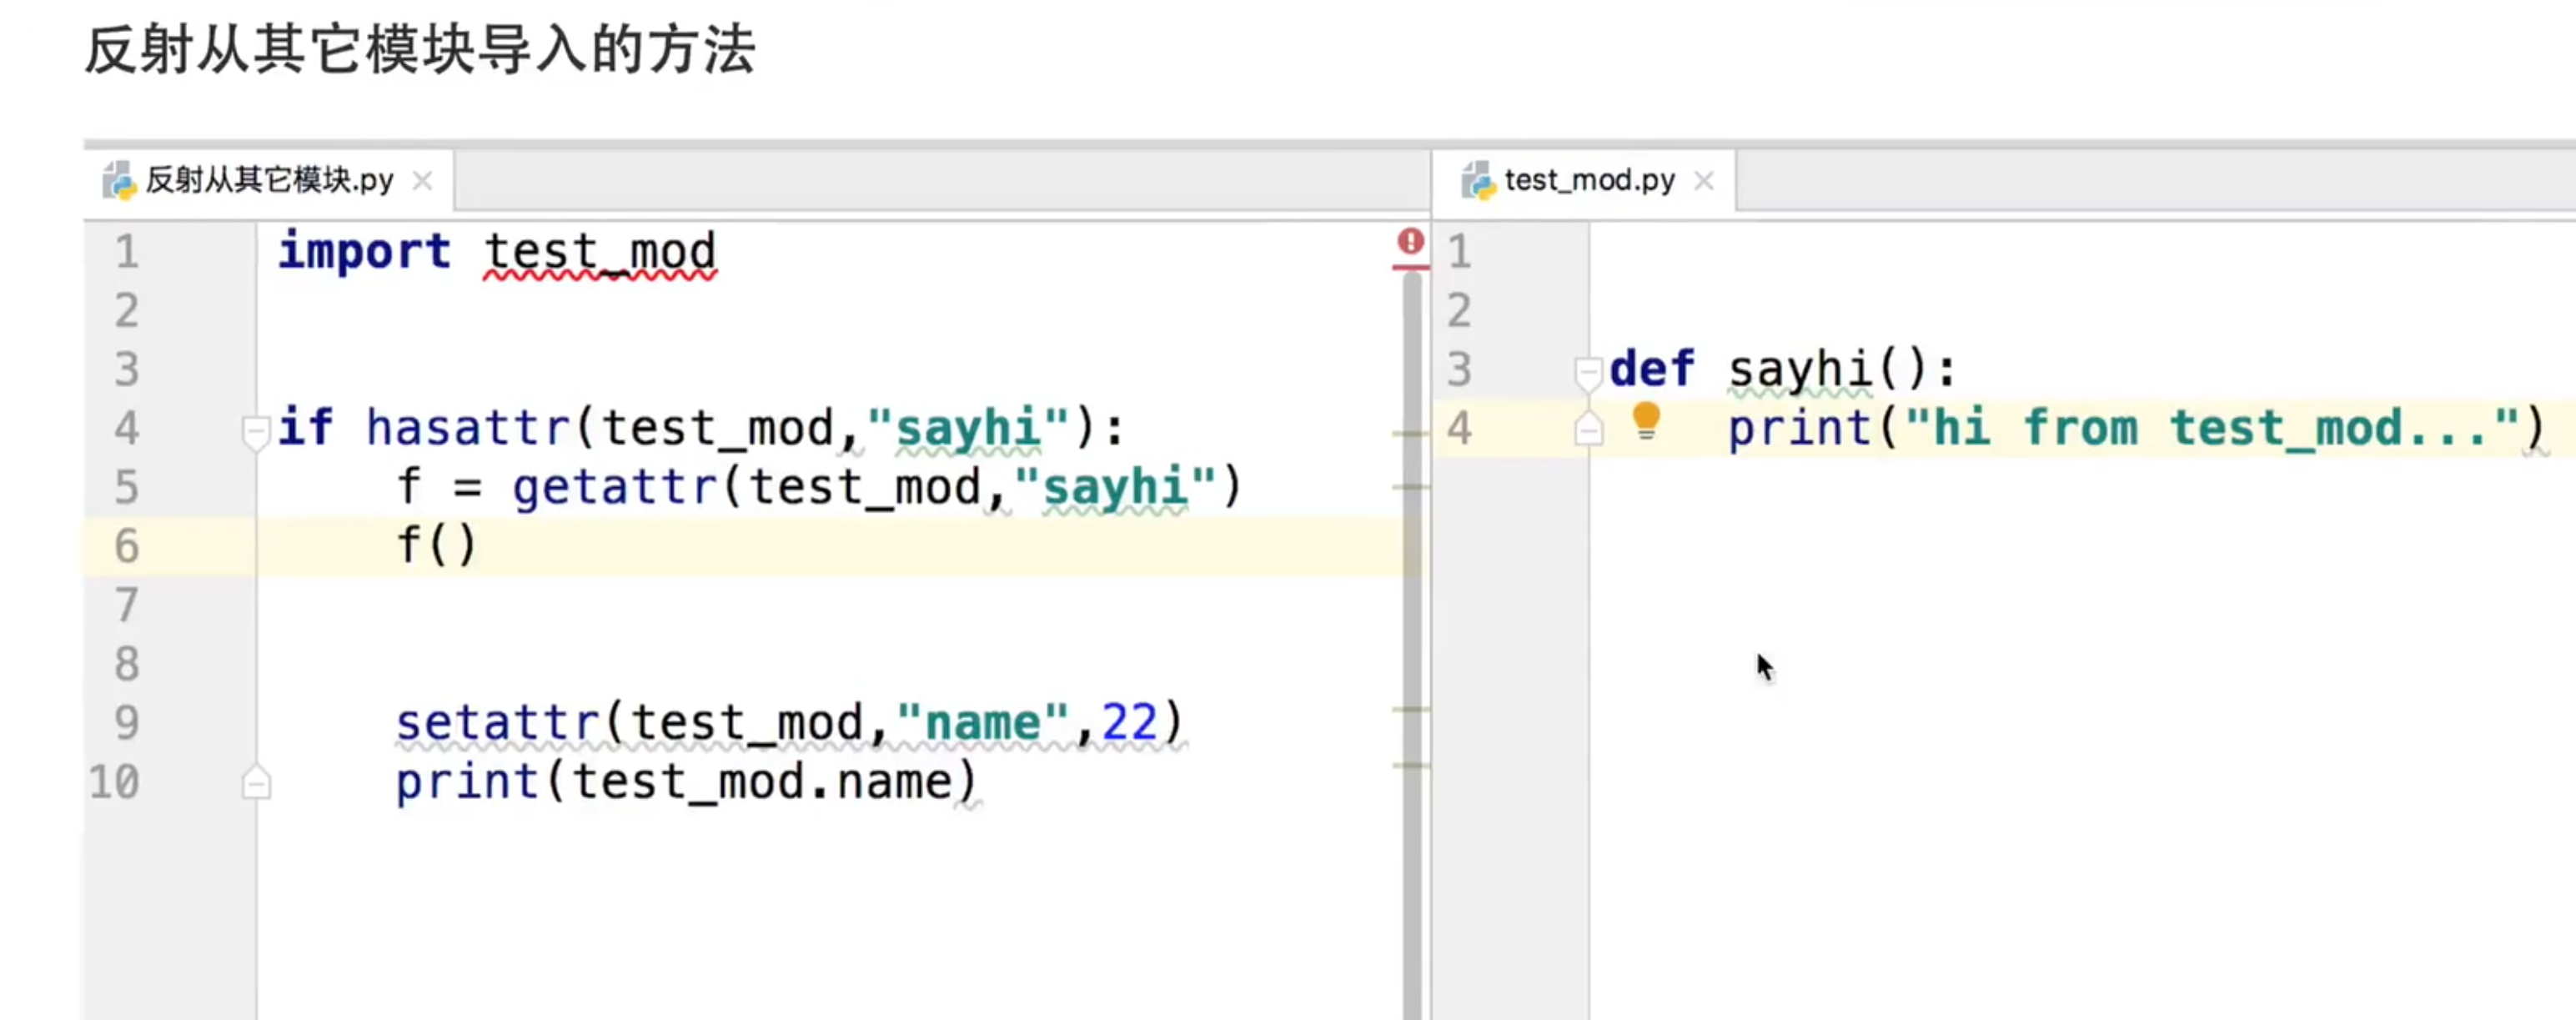

# 动态加载模块

In [ ]:
import importlib

importlib.import_module("numpy") #通过字符串加载模块，用户输入的都是字符串

<module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'>

# 反射的妙用

访问一个网站，点击登录就跳转到登录界面，点击注册就跳转到注册界面，点击游客就进入游客界面

In [ ]:
# 学反射之前的写法
class User:
  def login(self):
    print('欢迎来到登录界面')
  def register(self):
    print('欢迎来到注册界面')
  def traveler(self):
    print('欢迎来到游客界面')

obj = User()

while True:
  user_cmd = input('>>:').strip()
  if user_cmd == 'login':
    obj.login()
  if user_cmd == 'register':
    obj.register()
  if user_cmd == 'traveler':
    obj.traveler()

# 如果有50个点击，就要写50个if语句

>>:register
欢迎来到注册界面
>>:traveler
欢迎来到游客界面


KeyboardInterrupt: ignored

In [ ]:
# 学反射之后的写法
# 学反射之前的写法
class User:
  def login(self):
    print('欢迎来到登录界面')
  def register(self):
    print('欢迎来到注册界面')
  def traveler(self):
    print('欢迎来到游客界面')

obj = User()

while True:
  user_cmd = input('>>:').strip()
  if hasattr(obj,user_cmd):
    func = getattr(obj,user_cmd)
    func()